## Tutorial: 
- Get 2-legged token: https://aps.autodesk.com/en/docs/oauth/v2/tutorials/get-2-legged-token
- Get 3-legged token: https://aps.autodesk.com/en/docs/oauth/v2/tutorials/get-3-legged-token/

What you need to do is:
1. Register an app on the [Autodesk Developer Network](https://aps.autodesk.com/en/docs/oauth/v2/tutorials/create-app/)
2. Get the `client id` and `client secret`

3. Set Client ID and Client Secret in the invironment variable  

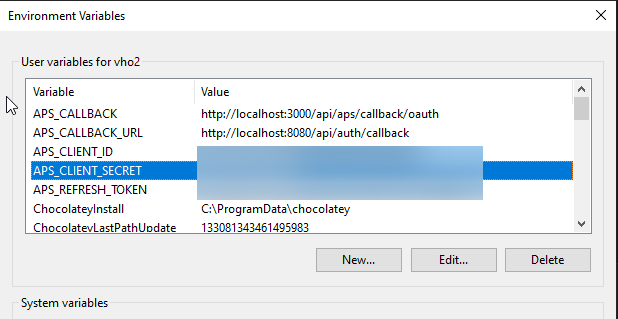

You can following this code to set the environment variable:
```csharp
Environment.SetEnvironmentVariable("APS_CLIENT_ID", "your_client_id");
Environment.SetEnvironmentVariable("APS_CLIENT_SECRET", "your_client_secret");
```

2. Install Nuget package `APSToolkit`

In [1]:
#r "nuget:APSToolkit"

Installed Packages APSToolkit, 1.0.5

Loading extensions from `C:\Users\vho2\.nuget\packages\microsoft.data.analysis\0.21.1\interactive-extensions\dotnet\Microsoft.Data.Analysis.Interactive.dll`

In [2]:
using APSToolkit;

### Use APS Toolkit

#### 2Legged Authentication


In [3]:
var client = Environment.GetEnvironmentVariable("APS_CLIENT_ID");
var secret = Environment.GetEnvironmentVariable("APS_CLIENT_SECRET");
var token = APSToolkit.Auth.Authentication.Get2LeggedToken(client, secret);
var accessToken = token.Result;
if(string.IsNullOrEmpty(accessToken)) {
    throw new Exception("Problem with the authentication");
}
else {
    Console.WriteLine("Token Authentication Successful");
}

Token Authentication Successful


In [4]:
// in the case you seted the environment variables
var token = APSToolkit.Auth.Authentication.Get2LeggedToken();
var accessToken = token.Result;
if(string.IsNullOrEmpty(accessToken)) {
    throw new Exception("Problem with the authentication");
}
else {
    Console.WriteLine("Token Authentication Successful");
}

Token Authentication Successful


In [5]:
// You can get the client and secret from setting in the environment variables
var clientId =APSToolkit.Auth.Authentication.GetClientId();
var clientSecret = APSToolkit.Auth.Authentication.GetClientSecret();

#### 3Legged Authentication


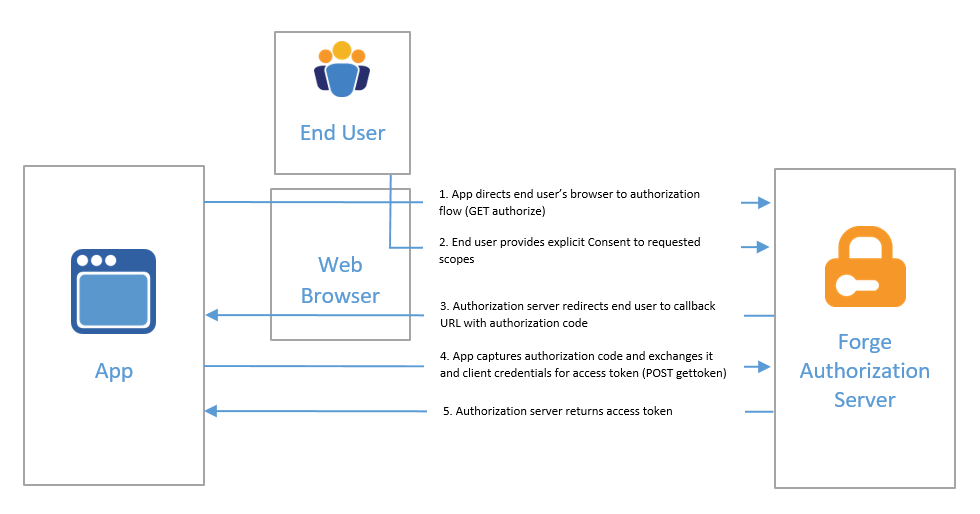

To get the `APS_REFRESH_TOKEN` you need to use postman or your application. 
- From Postman : https://aps.autodesk.com/blog/3-legged-authentication-postman
- From your application: https://forge-tutorials.autodesk.io/tutorials/simple-viewer/auth

In [8]:
using APSToolkit.Auth;
using Autodesk.Forge;
var clientID = Environment.GetEnvironmentVariable("APS_CLIENT_ID", EnvironmentVariableTarget.User);
var clientSecret = Environment.GetEnvironmentVariable("APS_CLIENT_SECRET", EnvironmentVariableTarget.User);
var refreshToken = Environment.GetEnvironmentVariable("APS_REFRESH_TOKEN", EnvironmentVariableTarget.User);
Scope[] scope = new Scope[]
    {Scope.DataRead, Scope.DataWrite, Scope.DataCreate, Scope.BucketRead, Scope.BucketCreate};
var Leg3Token = Authentication.Refresh3LeggedToken(clientID, clientSecret, scope).Result;
if(string.IsNullOrEmpty(Leg3Token)) {
    throw new Exception("Problem with the authentication");
}
else {
    Console.WriteLine("Token Authentication Successful");
}


Token Authentication Successful


### Use Autodesk.Forge Nuget

#### 2Legged Authentication


In [9]:
using Autodesk.Forge;
Autodesk.Forge.TwoLeggedApi twoLeggedApi = new Autodesk.Forge.TwoLeggedApi();
var ClientID = Environment.GetEnvironmentVariable("APS_CLIENT_ID");
var ClientSecret = Environment.GetEnvironmentVariable("APS_CLIENT_SECRET");
dynamic token = twoLeggedApi.Authenticate(ClientID, ClientSecret, "client_credentials",
  new Scope[]
  {
    Scope.DataRead, Scope.DataWrite, Scope.DataCreate, Scope.DataSearch, Scope.BucketCreate, Scope.BucketRead,
    Scope.BucketUpdate, Scope.BucketDelete
  });
var access_token = token.access_token;
if (string.IsNullOrEmpty(access_token))
{
  throw new Exception("Problem with the authentication");
}
else
{
  Console.WriteLine("Token Authentication Successful");
}


Token Authentication Successful
